(<matplotlib.image.AxesImage at 0x7113e50>,
 <matplotlib.text.Text at 0x7103230>)

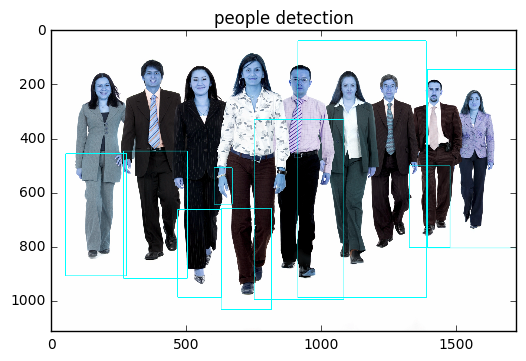

In [1]:
# %load people_detect_hog.py
import cv2
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline

def is_inside(o, i):
    ox, oy, ow, oh = o
    ix, iy, iw, ih = i
    return ox > ix and oy > iy and ox + ow < ix + iw and oy + oh < iy + ih

def draw_person(image, person):
  x, y, w, h = person
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)

img = cv2.imread("../images/people.jpg")
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

found, w = hog.detectMultiScale(img, winStride=(8,8),scale=1.05)

found_filtered = []
for ri, r in enumerate(found):
    for qi, q in enumerate(found):
        if ri != qi and is_inside(r, q):
            break
    else:
        found_filtered.append(r)

for person in found_filtered:
  draw_person(img, person)

plot.imshow(img), plot.title("people detection")

